Se ha generado un nuevo DataFrame que incluye los resultados de clustering obtenidos mediante el algoritmo K-Means dando indices de silueta (con PCA=0.4341) (sin PCA=0.44104)
En resumen, se llevará a cabo un análisis detallado de los resultados de clustering obtenidos con K-Means, tanto con PCA como sin PCA, con el objetivo de proporcionar información valiosa que pueda contribuir a la comprensión y la interpretación adecuada de los datos.

In [17]:
import pandas as pd
df_Clustering=pd.read_csv('Bancolombia_Clustering_5.csv')
df_Clustering.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio,k_means_pca,k_means
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0,2,1
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0,1,2
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0,1,0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0,1,0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0,2,1


In [ ]:
df_Clustering.isnull().sum()

Fecha_Corte                         0
Tipo_de_persona                     0
Sexo                                0
Tamaño_de_empresa                   0
Tipo_de_crédito                     1
Tipo_de_garantía                    1
Producto de crédito                 1
Plazo de crédito                    1
Tasa_efectiva_promedio_ponderada    1
margen_adicional                    1
Montos_desembolsados                1
Numero_de_creditos_desembolsados    1
Antiguedad_de_la_empresa            1
Tipo_de_Tasa                        1
Rango_monto_desembolsado            1
Clase_deudor                        1
Codigo_CIIU                         1
Codigo_Municipio                    1
k_means_pca                         1
k_means                             1
dtype: int64

In [ ]:
df_Clustering.dropna()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio,k_means_pca,k_means
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.00,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544.0,11001.0,2.0,1.0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.00,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622.0,5154.0,1.0,2.0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.00,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613.0,17001.0,1.0,0.0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.00,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90.0,5266.0,1.0,0.0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.00,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010.0,11001.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51298,01/12/2023,Jurídica,No aplica,Pequeña empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.10,0.00,8449247.41,2.0,0 a 5 años,FS,Mayor a 6 SMLMV y menor o igual a 12 SMLMV,Deudor de la entidad,5611.0,5615.0,2.0,1.0
51299,27/10/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 19 y 24 meses,39.64,0.00,750150.00,3.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,90.0,25754.0,1.0,0.0
51300,27/10/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos hasta 2 SMMLV,Avances en efectivo,39.64,0.00,2000000.00,1.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor nuevo en la entidad,10.0,15759.0,3.0,3.0
51301,10/11/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Vehículo,Más de 3 años y hasta 5 años,38.16,18.99,31730000.00,4.0,No aplica(1),DTF,Mayor a 6 SMLMV menor o igual a 12 SMLMV,Deudor nuevo en la entidad,10.0,5001.0,3.0,3.0


In [ ]:
df_Clustering.columns

Index(['Fecha_Corte', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa',
       'Tipo_de_crédito', 'Tipo_de_garantía', 'Producto de crédito',
       'Plazo de crédito', 'Tasa_efectiva_promedio_ponderada',
       'margen_adicional', 'Montos_desembolsados',
       'Numero_de_creditos_desembolsados', 'Antiguedad_de_la_empresa',
       'Tipo_de_Tasa', 'Rango_monto_desembolsado', 'Clase_deudor',
       'Codigo_CIIU', 'Codigo_Municipio', 'k_means_pca', 'k_means'],
      dtype='object')

In [ ]:
columnas=['Fecha_Corte', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa',
       'Tipo_de_crédito', 'Tipo_de_garantía', 'Producto de crédito',
       'Plazo de crédito', 'Tasa_efectiva_promedio_ponderada',
       'margen_adicional', 'Montos_desembolsados',
       'Numero_de_creditos_desembolsados', 'Antiguedad_de_la_empresa',
       'Tipo_de_Tasa', 'Rango_monto_desembolsado', 'Clase_deudor',
       'Codigo_CIIU', 'Codigo_Municipio', 'k_means_pca']

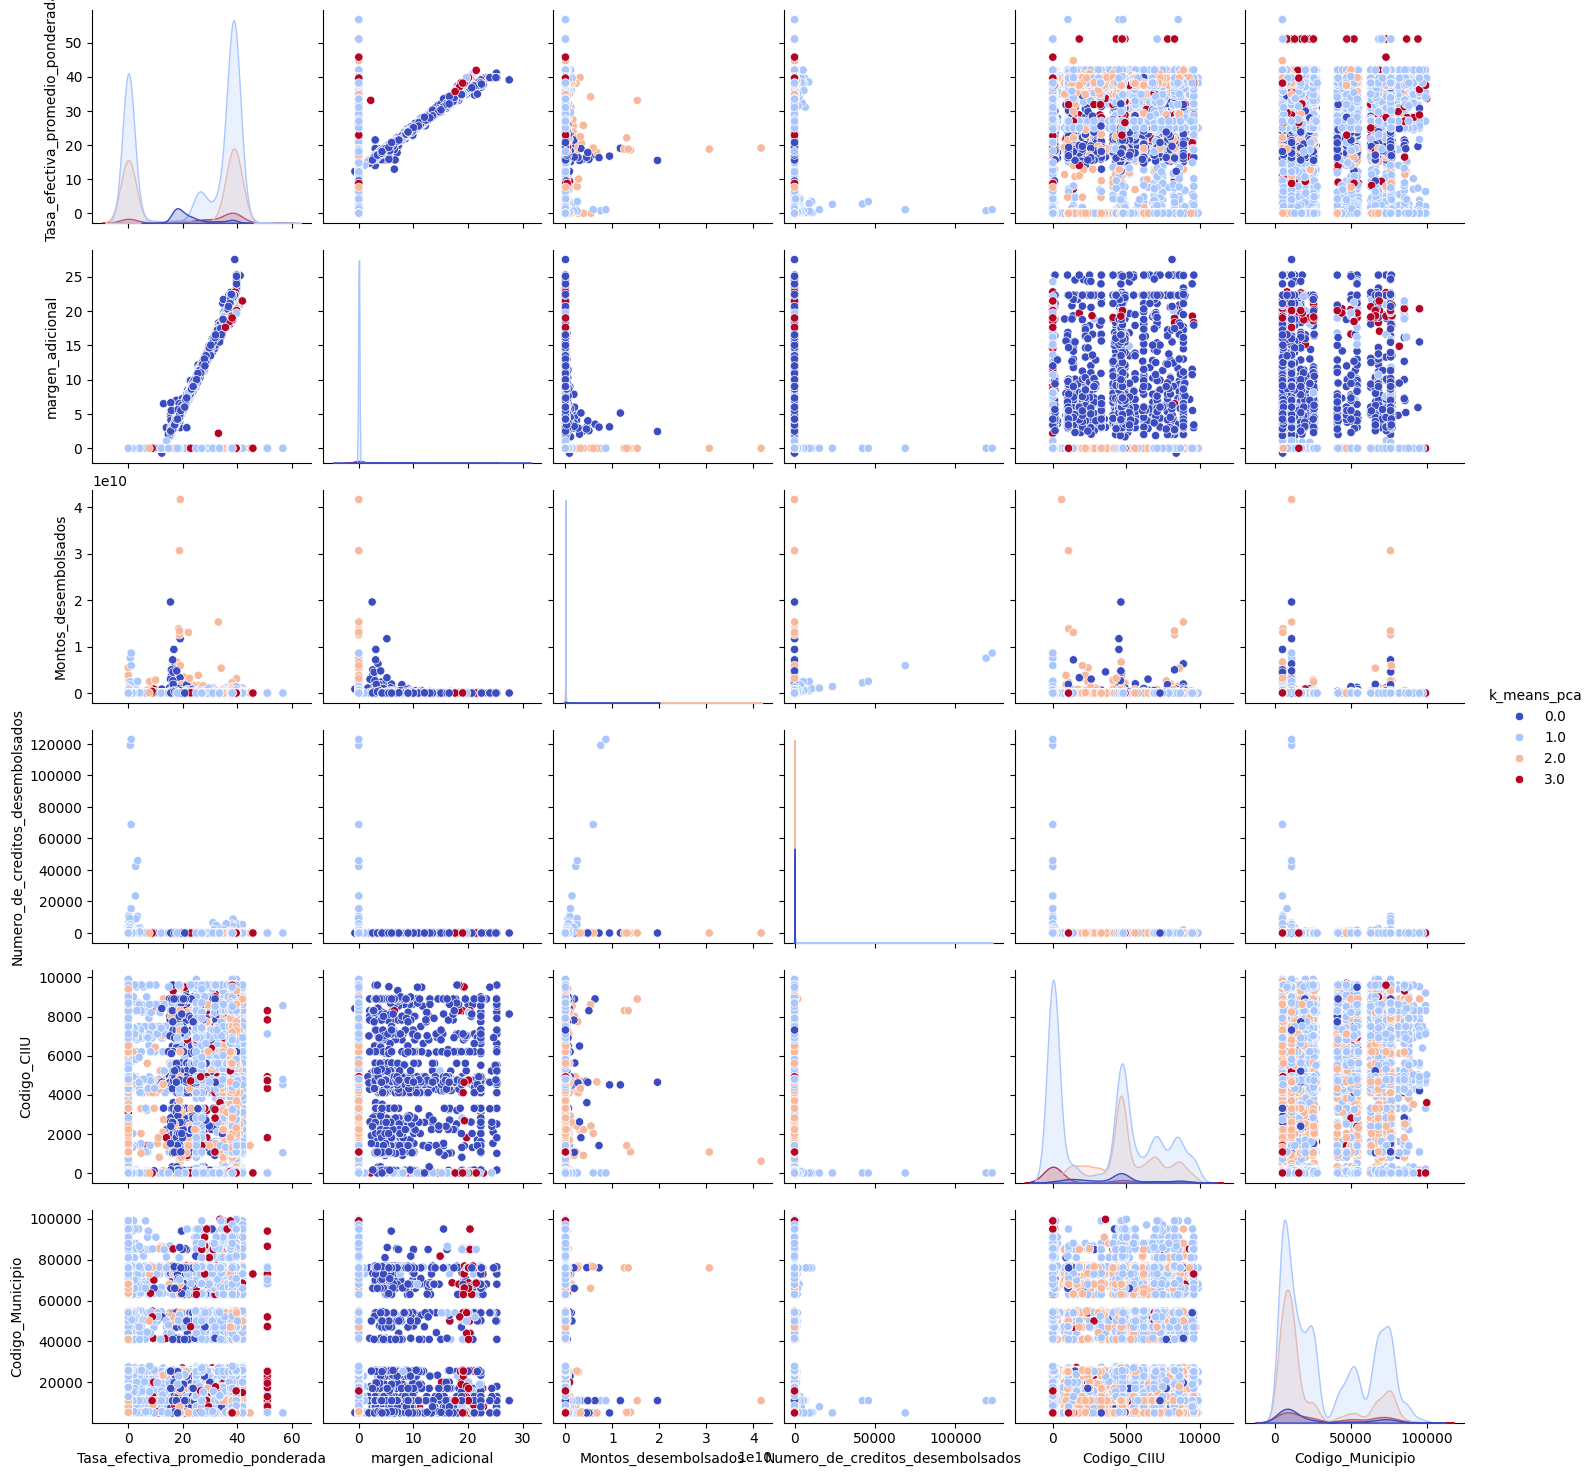

In [ ]:
import seaborn as sns
sns.pairplot(data = df_Clustering[columnas], hue='k_means_pca', palette='coolwarm')

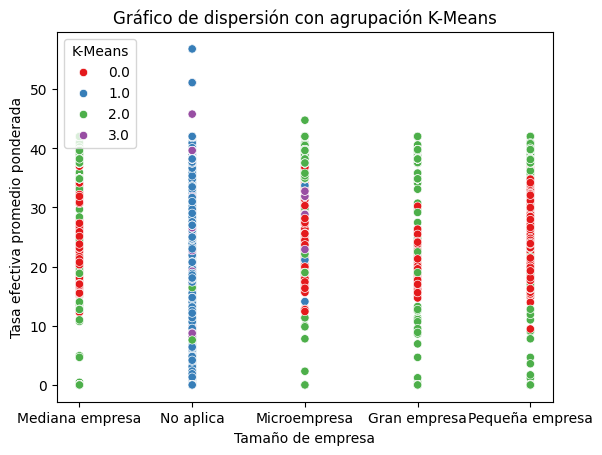

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar utilizando Seaborn
sns.scatterplot(data=df_Clustering, x='Tamaño_de_empresa', y='Tasa_efectiva_promedio_ponderada', hue='k_means_pca', palette='Set1')
plt.title('Gráfico de dispersión con agrupación K-Means')
plt.xlabel('Tamaño de empresa')
plt.ylabel('Tasa efectiva promedio ponderada')
plt.legend(title='K-Means')
plt.show()

Dividiendo en df segun los Clustering

# Clustering 0

In [ ]:
df_Clustering_0=df_Clustering[df_Clustering['k_means_pca']==0]
print(df_Clustering_0.shape)
df_Clustering_0.describe()

(1833, 20)


,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Codigo_CIIU,Codigo_Municipio,k_means_pca,k_means
count,1833.000000,1833.000000,1.833000e+03,1833.000000,1833.000000,1833.000000,1833.0,1833.000000
mean,22.747447,8.442526,1.230638e+08,2.620295,4247.923622,24191.820513,0.0,1.022913
std,6.913335,6.109410,6.965483e+08,5.989516,2350.278596,25587.630819,0.0,0.305551
min,9.460000,-0.710000,6.000000e+03,1.000000,10.000000,5001.000000,0.0,0.000000
25%,17.780000,4.150000,3.929376e+06,1.000000,2229.000000,5360.000000,0.0,1.000000
50%,20.060000,6.000000,1.198479e+07,1.000000,4632.000000,11001.000000,0.0,1.000000
75%,24.800000,10.000000,5.833272e+07,2.000000,4923.000000,25899.000000,0.0,1.000000
max,41.090000,27.510000,1.960000e+10,80.000000,9609.000000,95001.000000,0.0,3.000000


<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


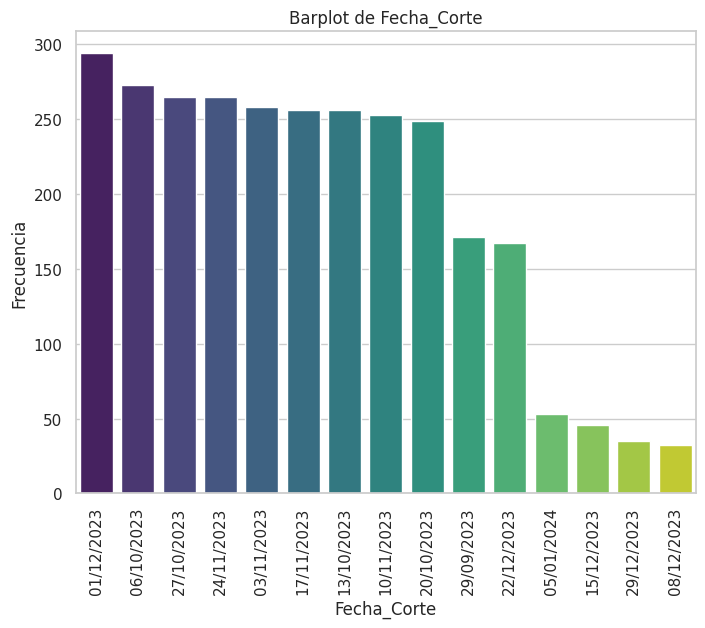

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


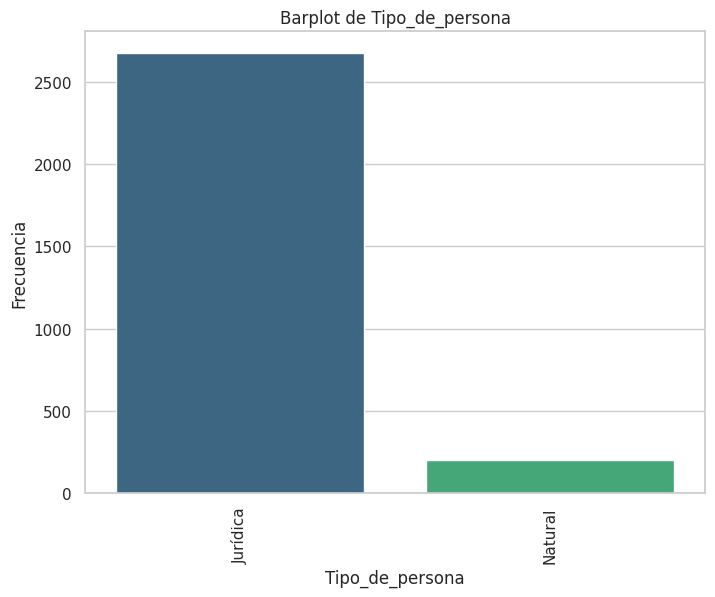

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


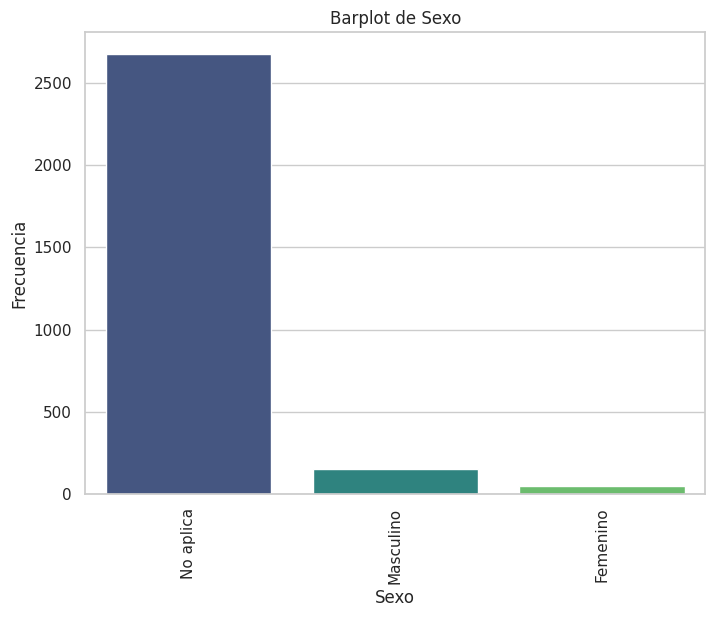

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


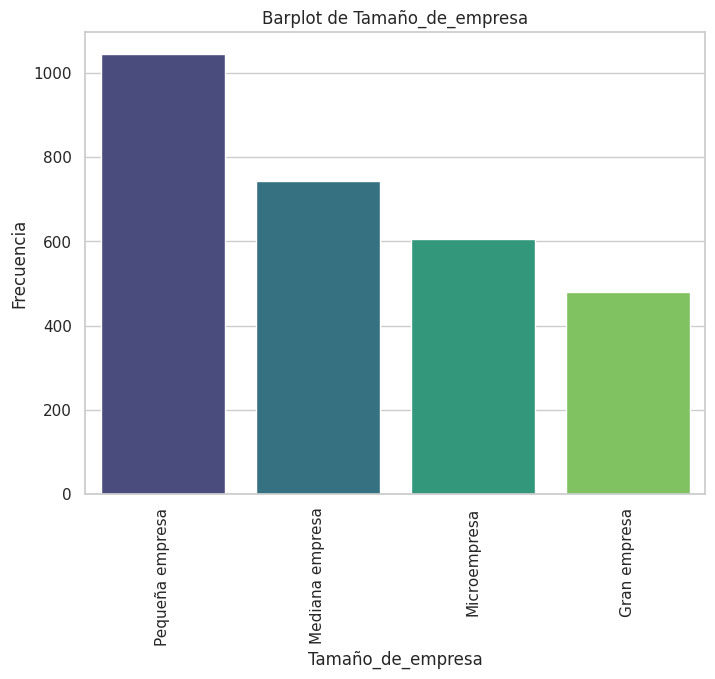

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


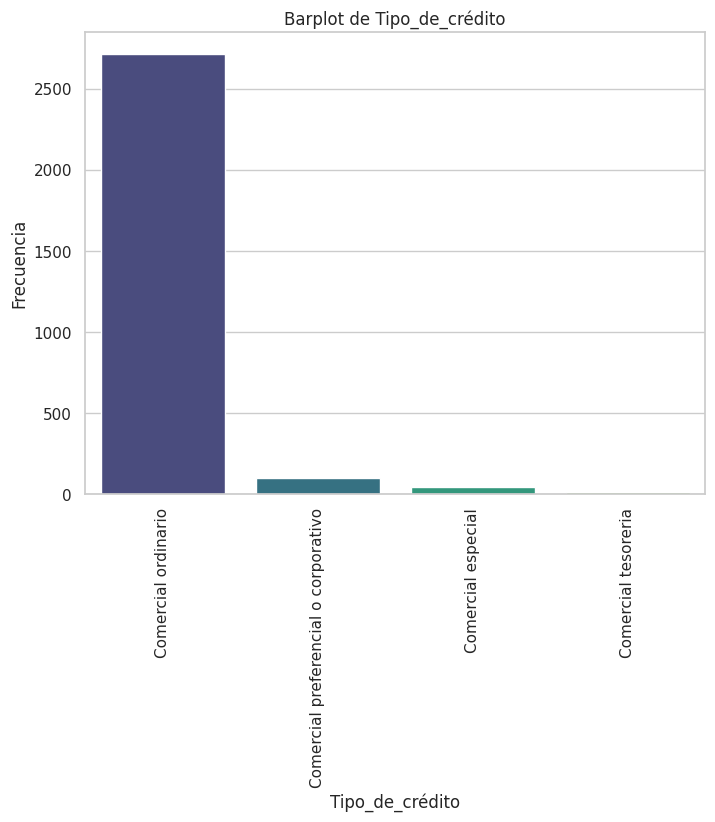

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


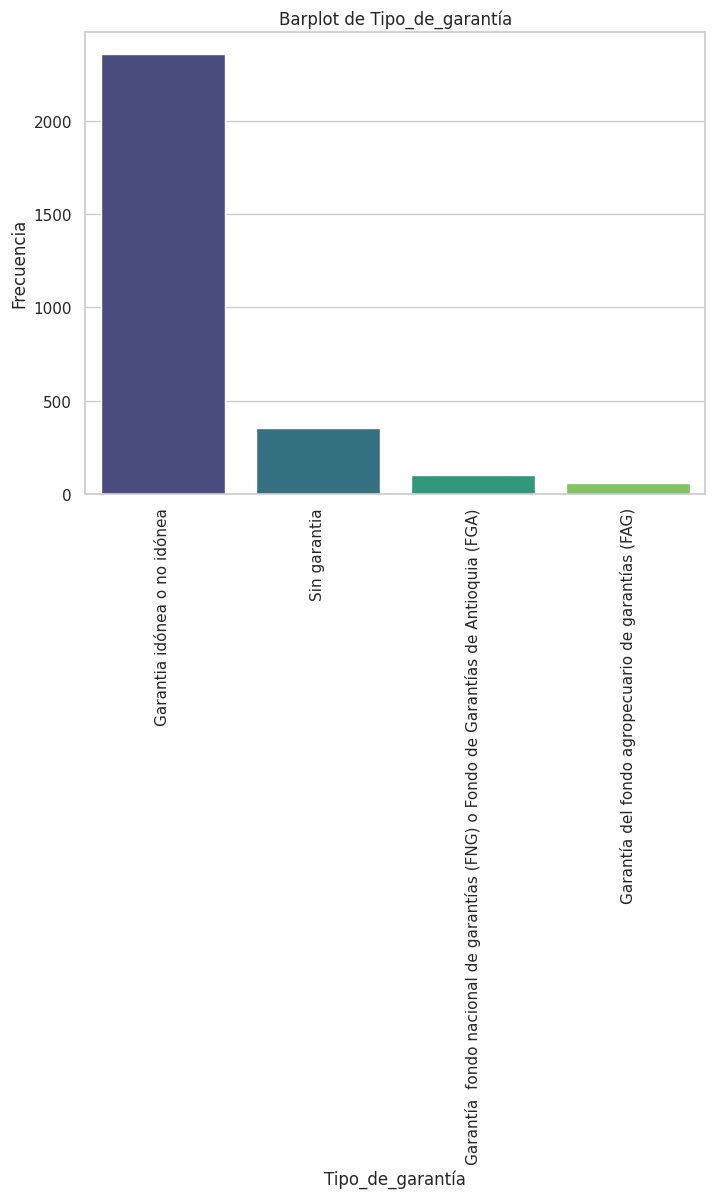

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


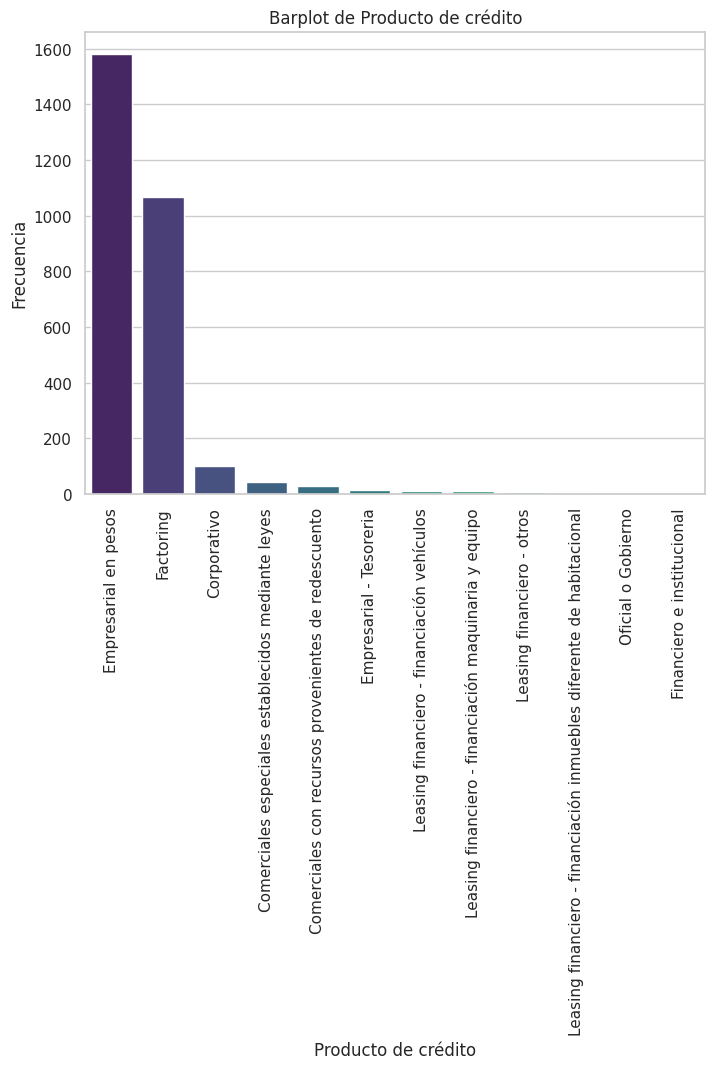

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


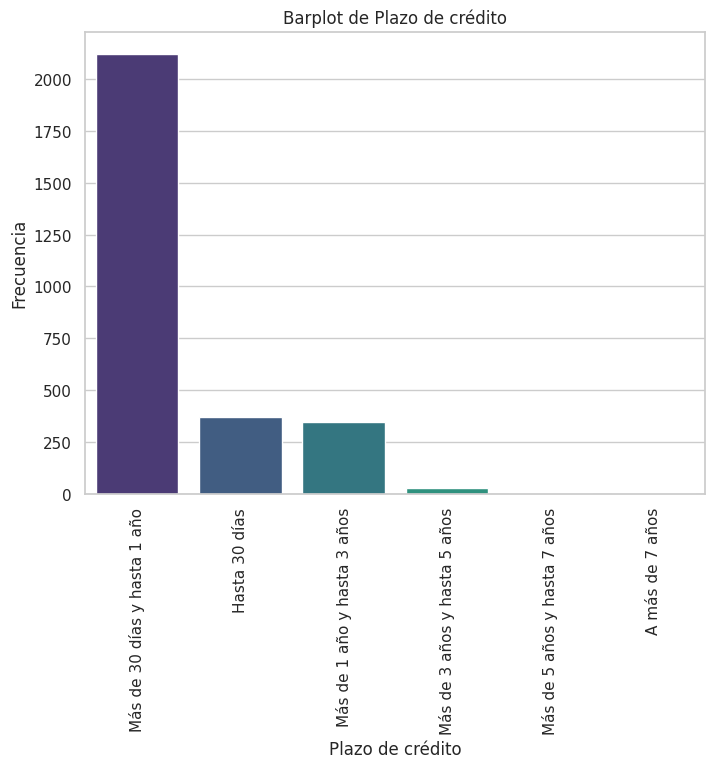

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


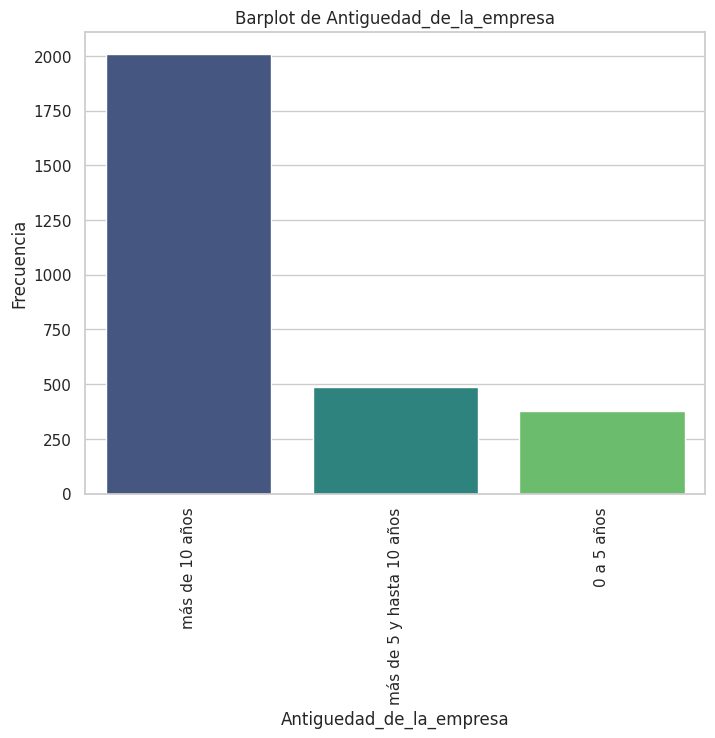

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


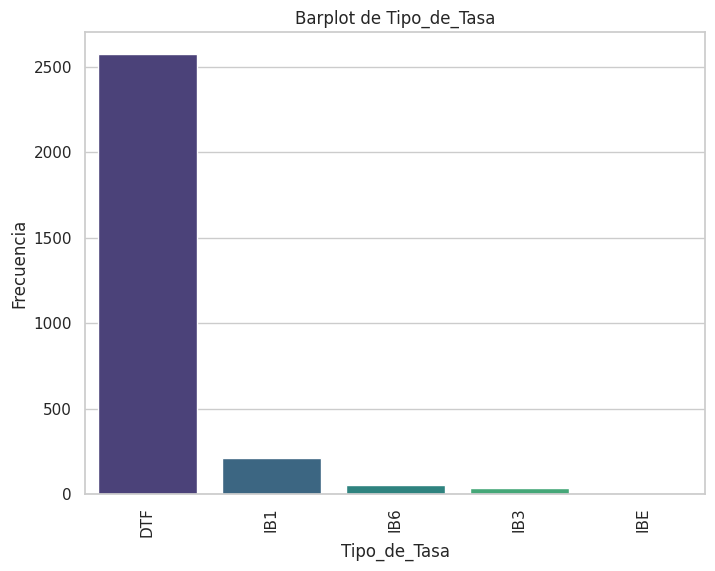

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


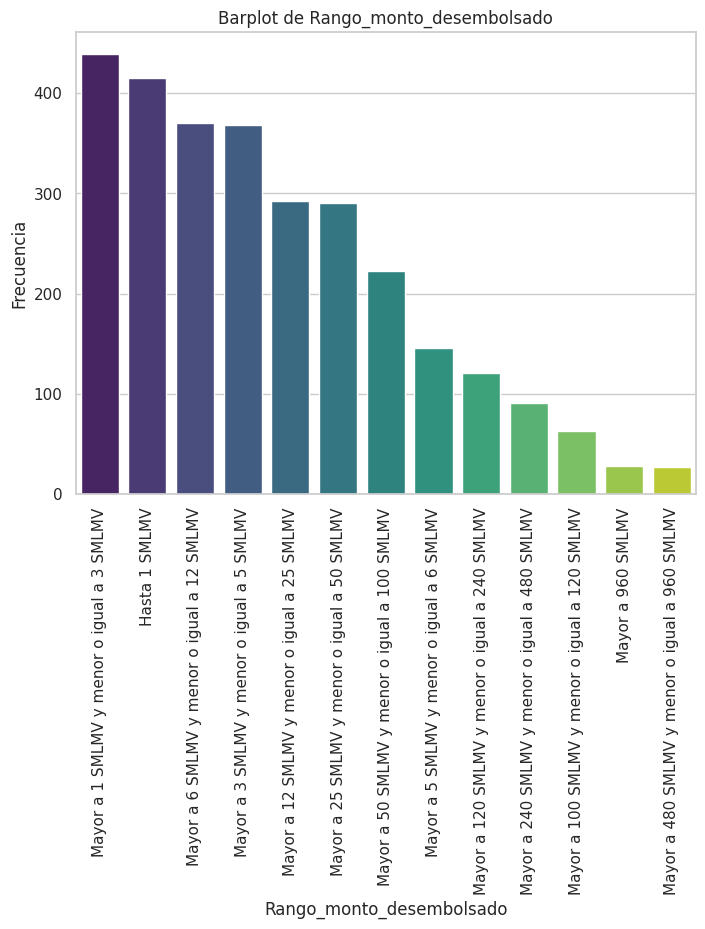

<ipython-input-18-3c2e95e09d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras


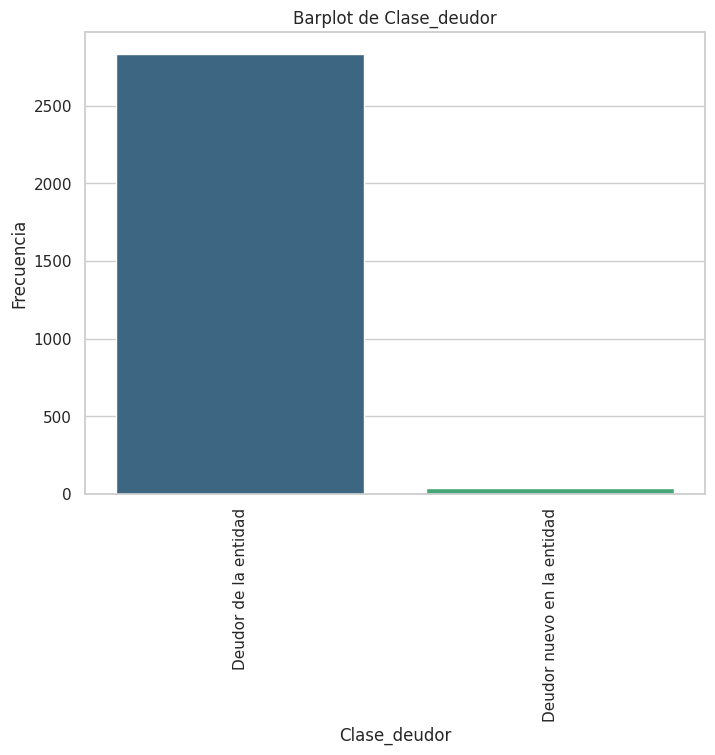

In [18]:
df_Clustering_0=df_Clustering[df_Clustering['k_means_pca']==0.0]
df_Clustering_0.shape
sns.set(style="whitegrid")
# Itera sobre cada columna del DataFrame y crea un gráfico de barras
df_Clustering_0_obj = df_Clustering_0.select_dtypes(include=['object'])

for column in df_Clustering_0_obj.columns:
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    sns.barplot(x=df_Clustering_0_obj[column].value_counts().index, y=df_Clustering_0_obj[column].value_counts(), palette="viridis")  # Grafico de barras
    plt.title(f'Barplot de {column}')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.show()

## Clusterin 1

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


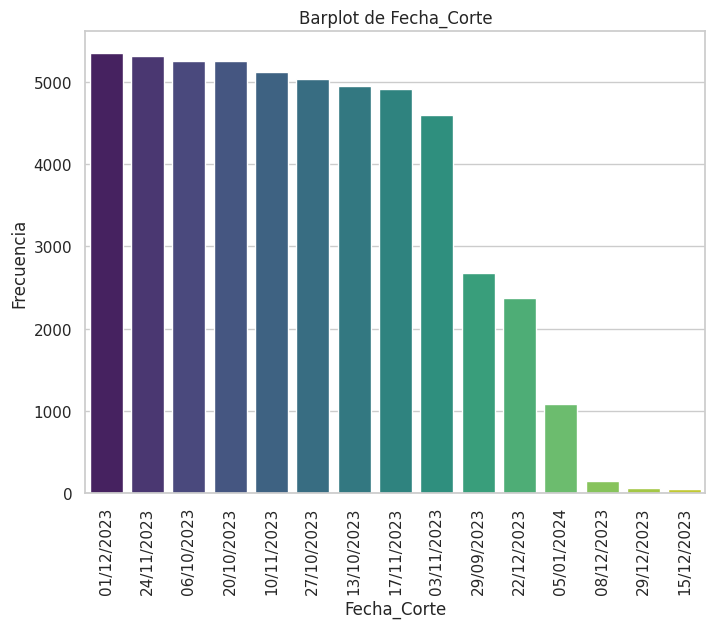

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


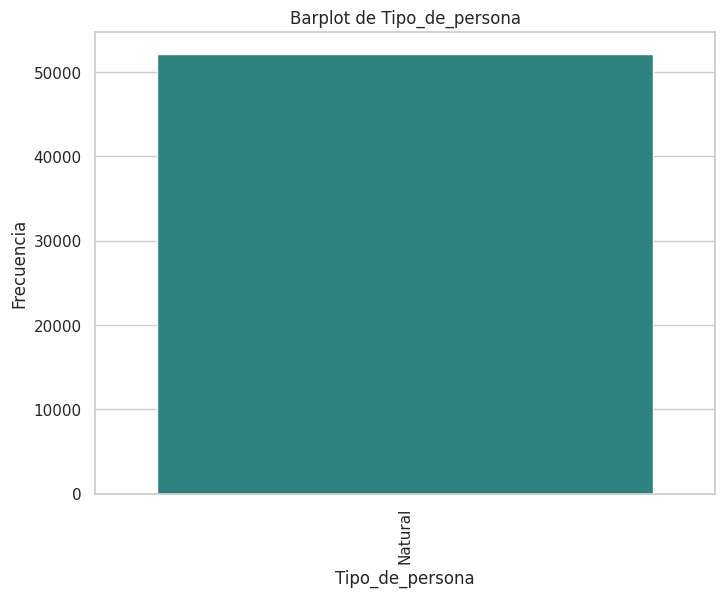

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


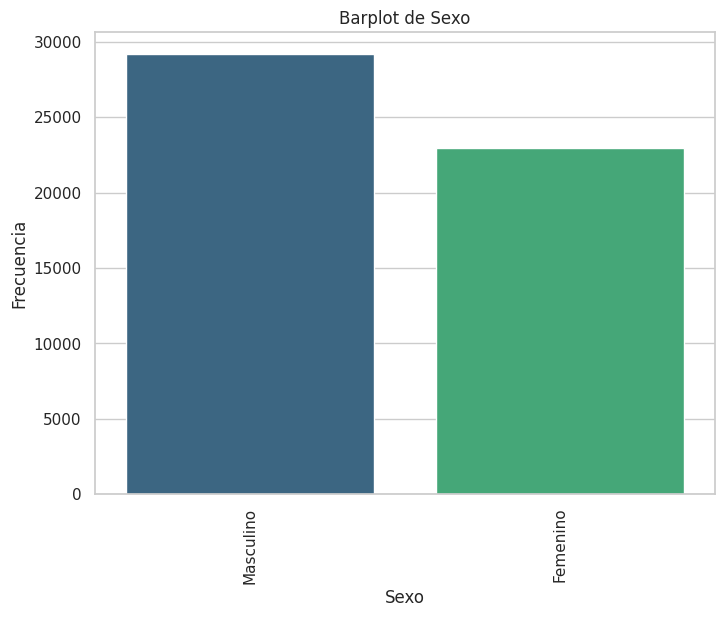

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


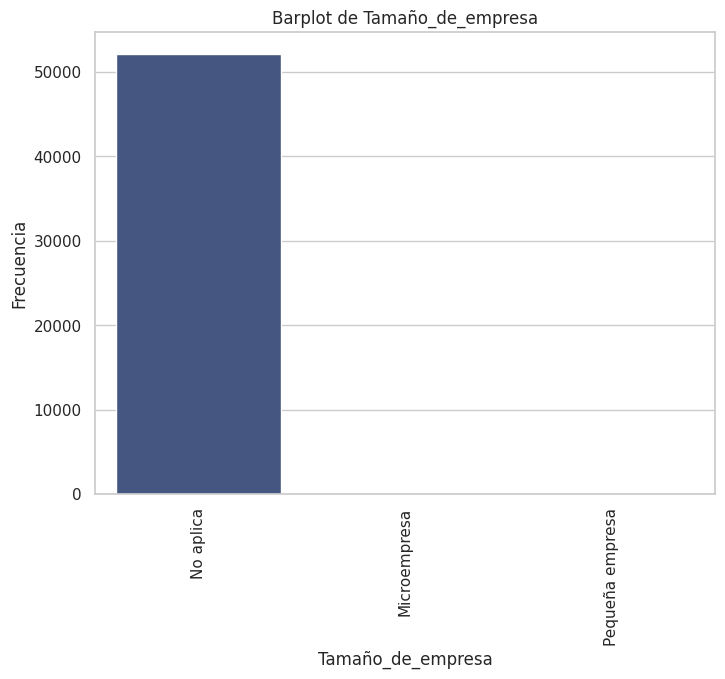

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


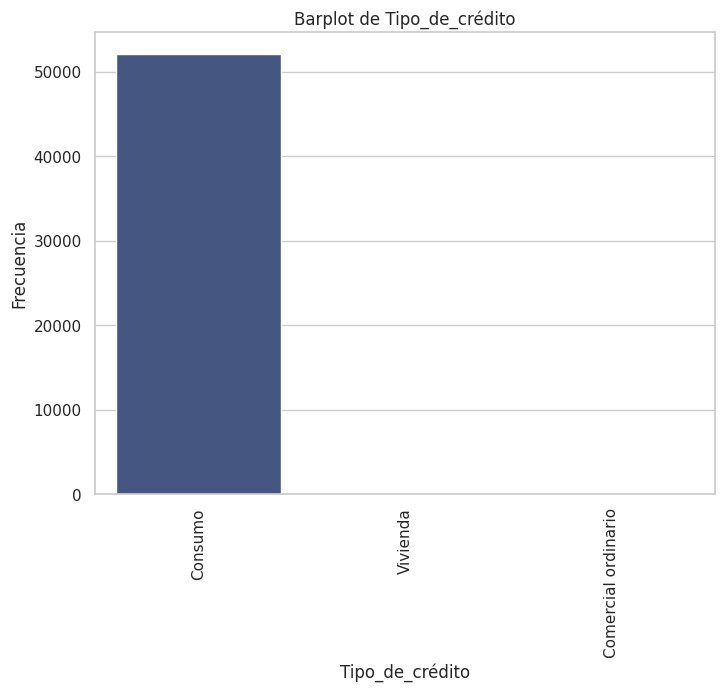

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


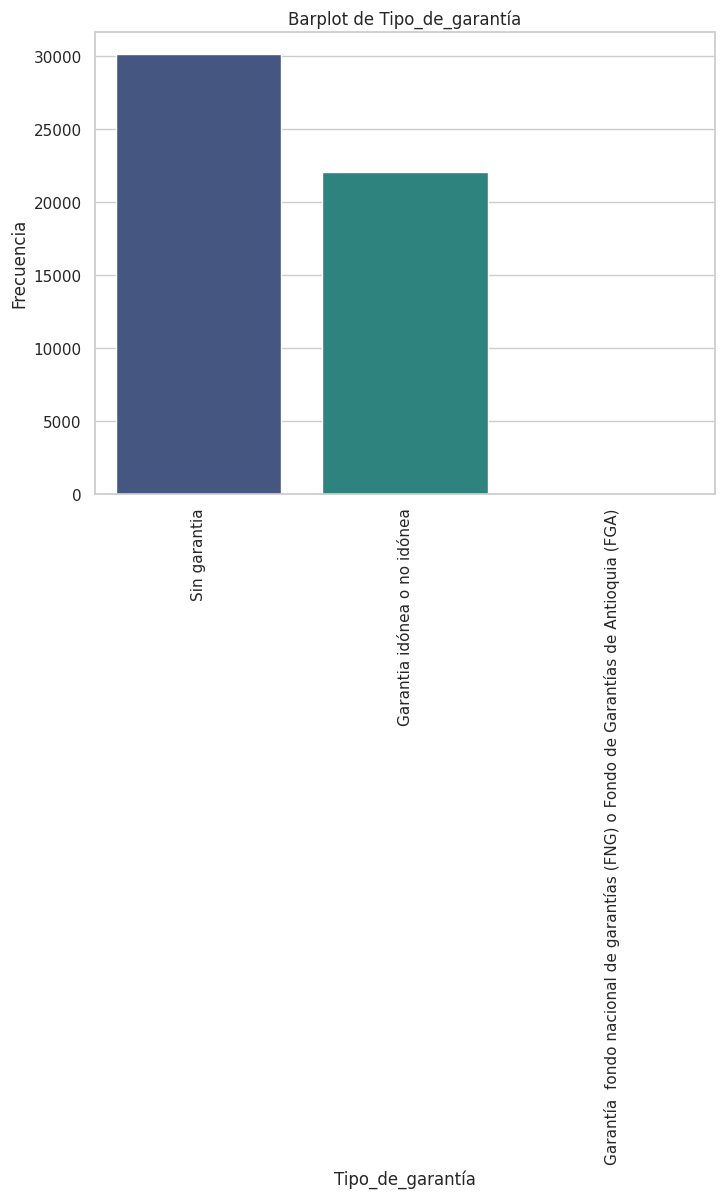

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


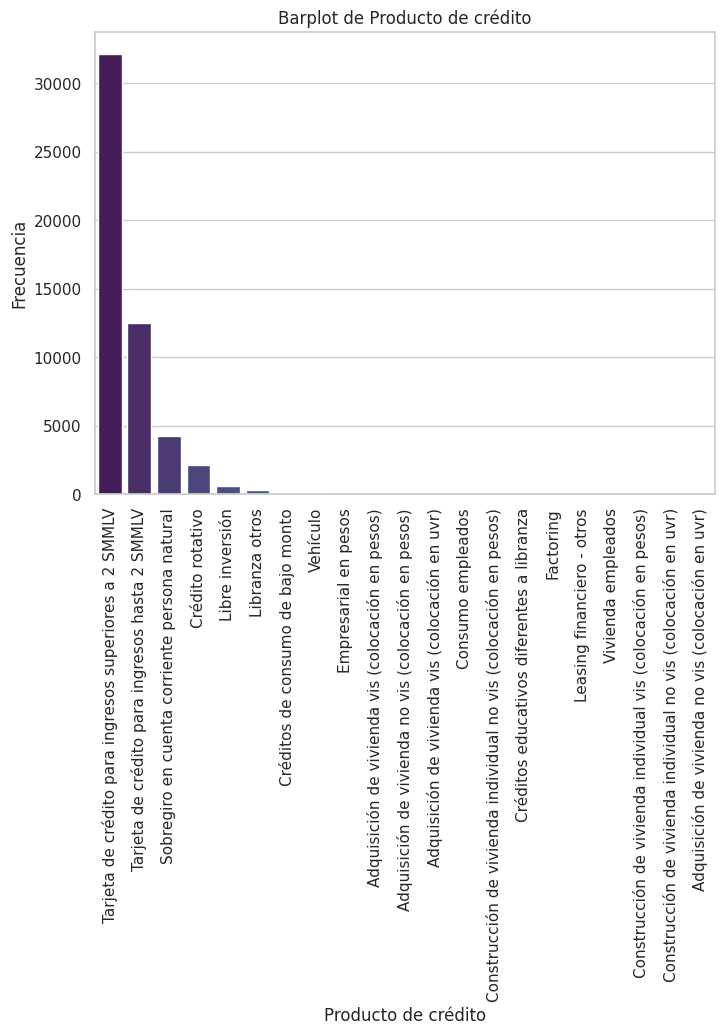

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


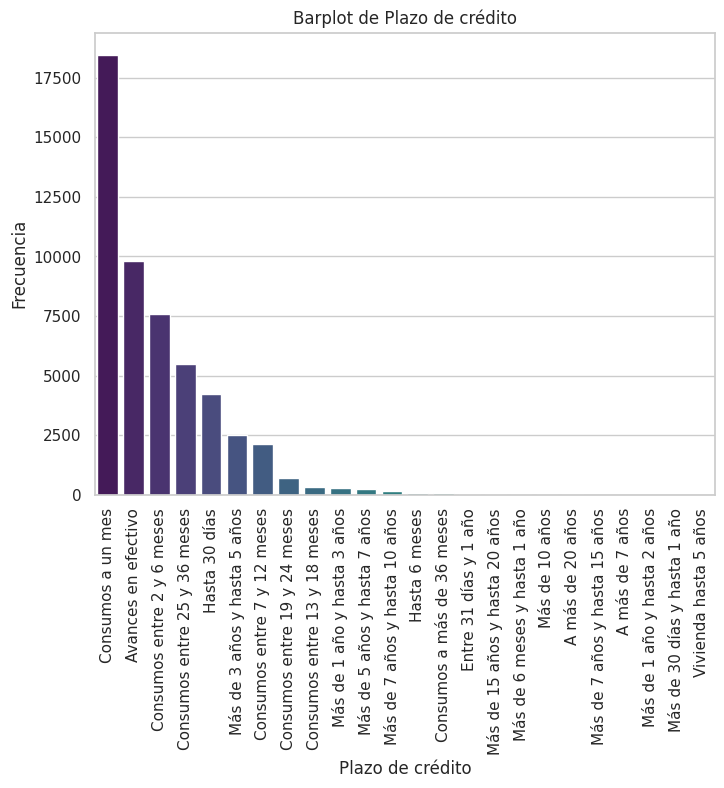

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


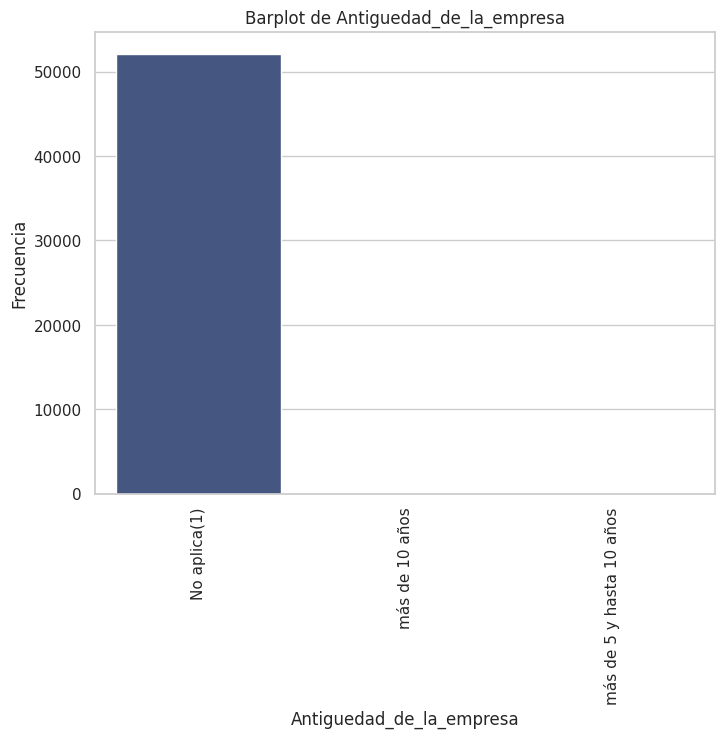

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


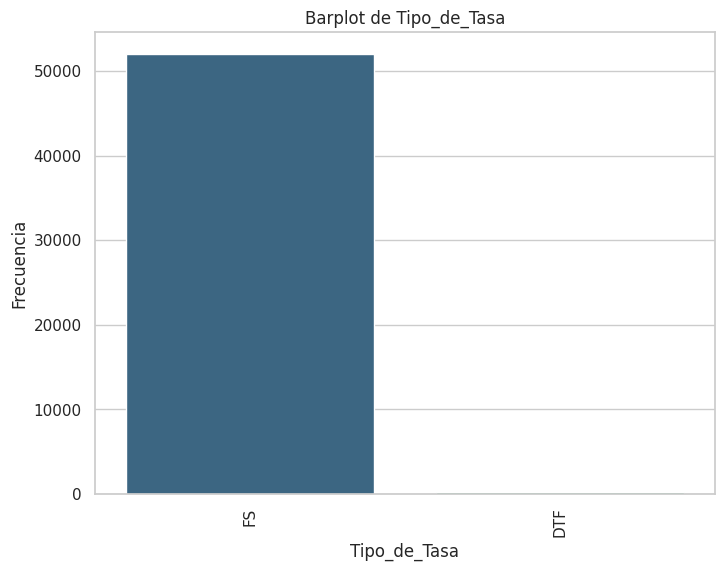

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


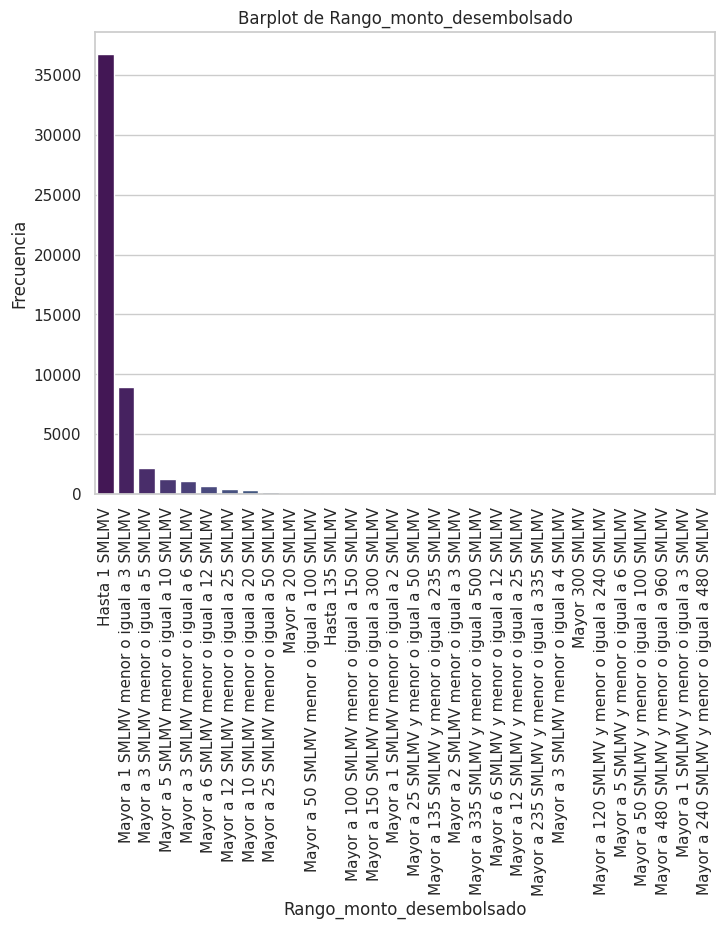

<ipython-input-20-18438852dded>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras


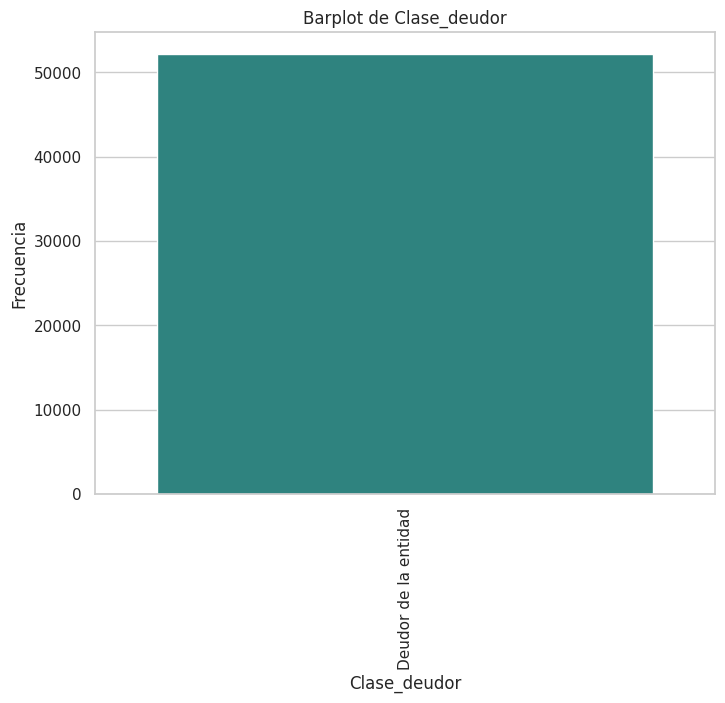

In [20]:
df_Clustering_1=df_Clustering[df_Clustering['k_means_pca']==1.0]
df_Clustering_1.shape
sns.set(style="whitegrid")
# Itera sobre cada columna del DataFrame y crea un gráfico de barras
df_Clustering_1_obj = df_Clustering_1.select_dtypes(include=['object'])

for column in df_Clustering_1_obj.columns:
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    sns.barplot(x=df_Clustering_1_obj[column].value_counts().index, y=df_Clustering_1_obj[column].value_counts(), palette="viridis")  # Grafico de barras
    plt.title(f'Barplot de {column}')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.show()

## clustering 2

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


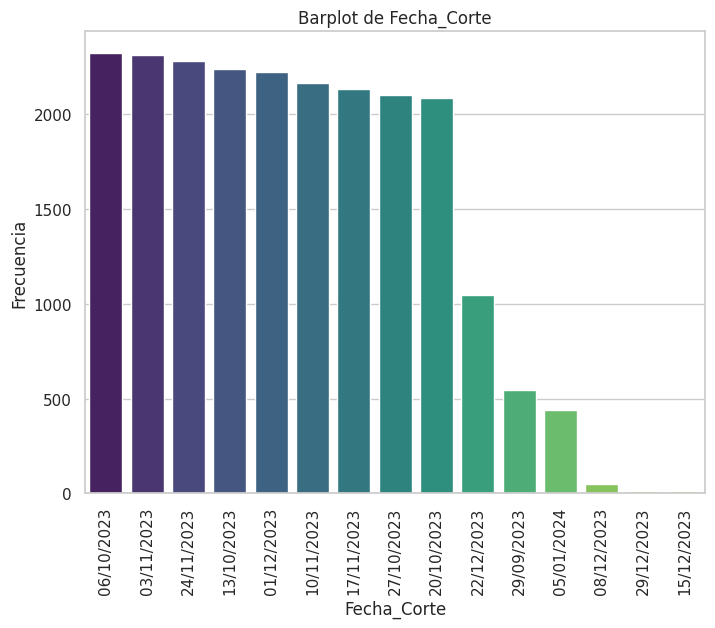

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


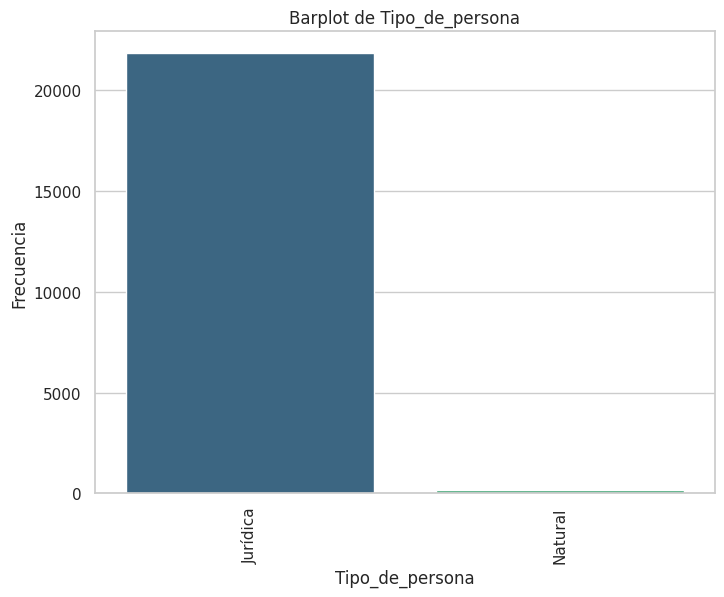

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


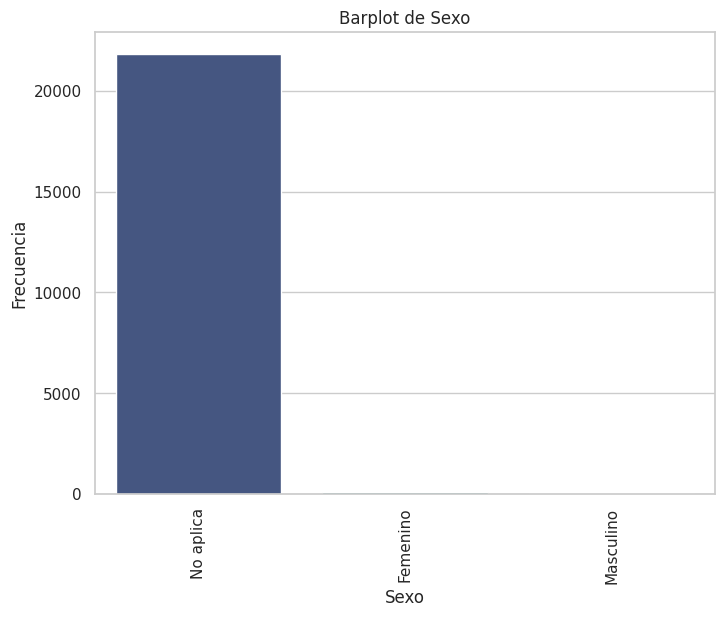

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


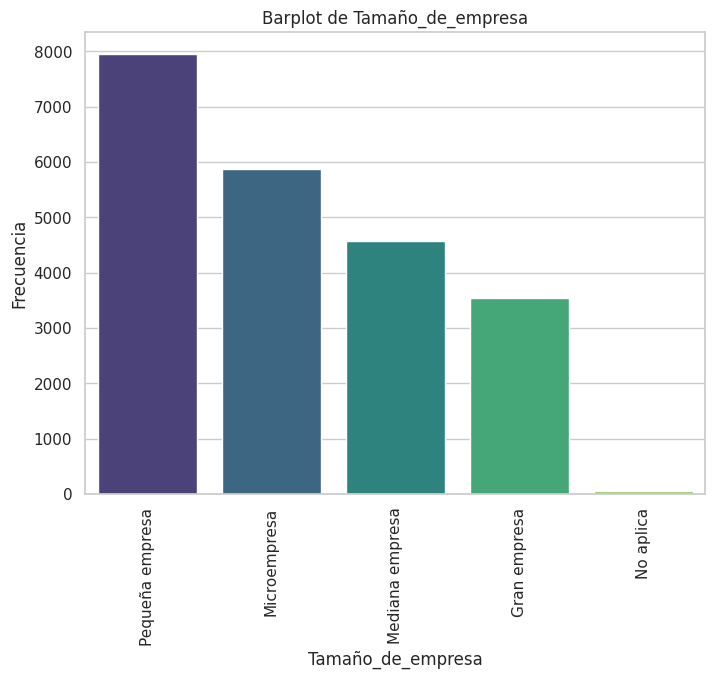

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


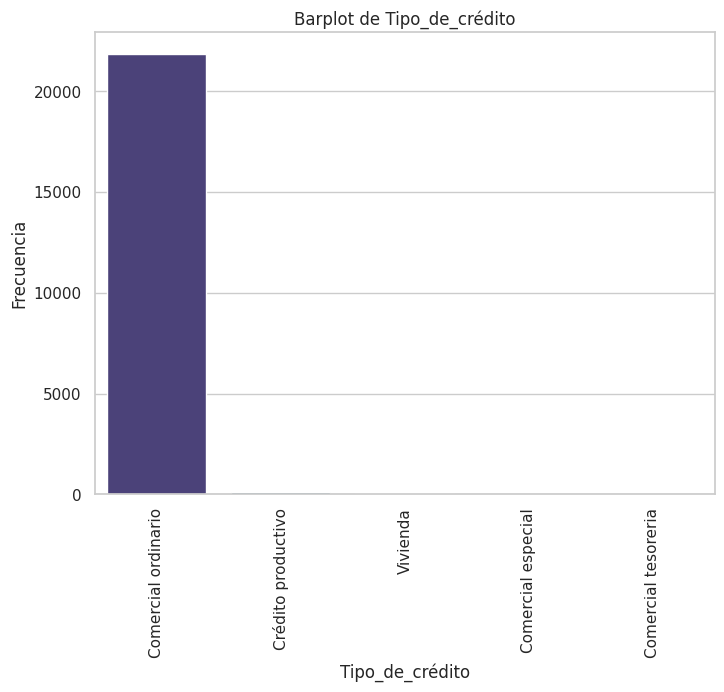

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


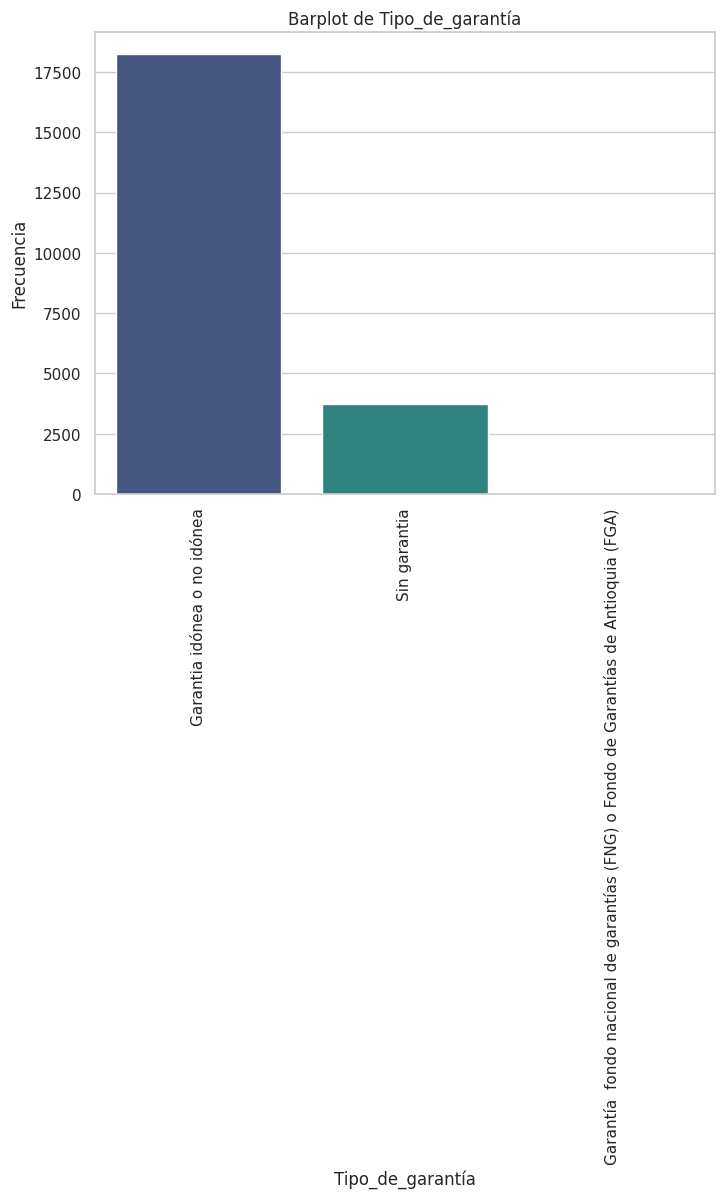

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


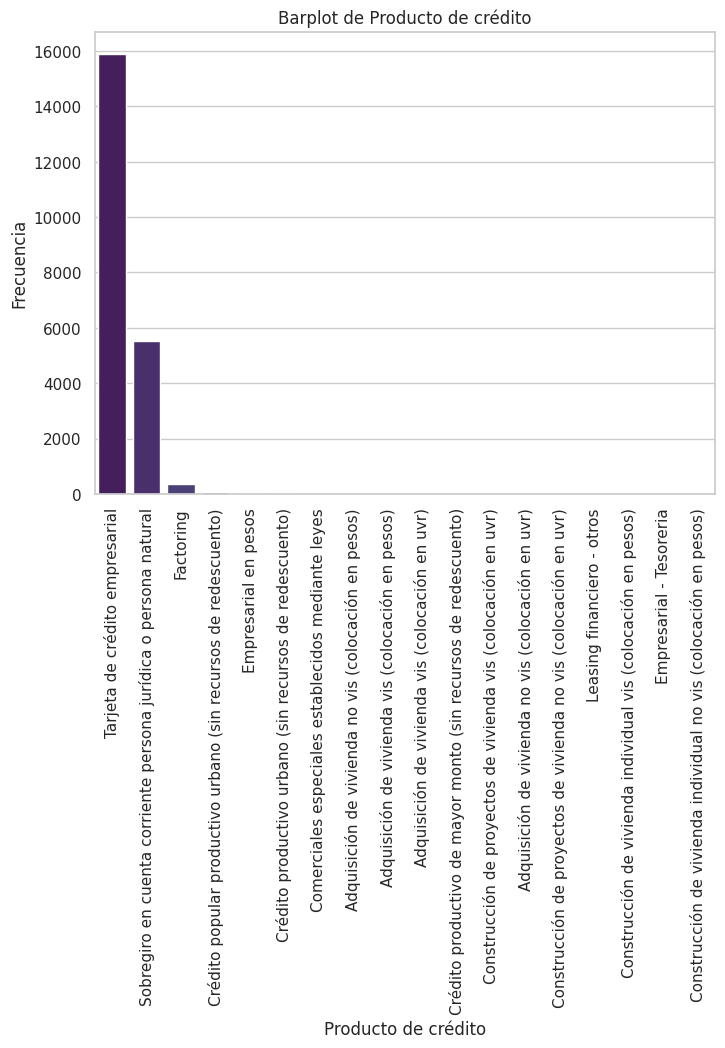

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


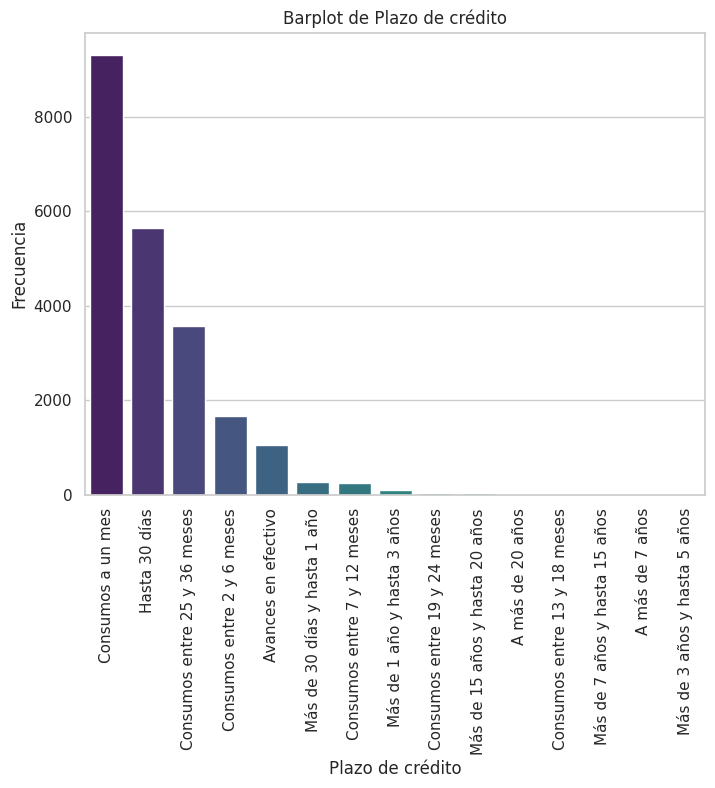

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


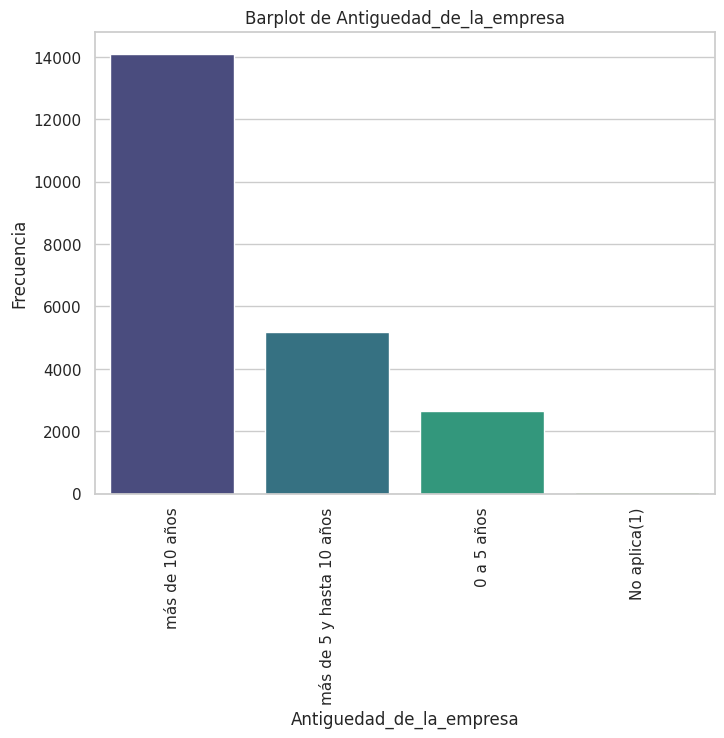

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


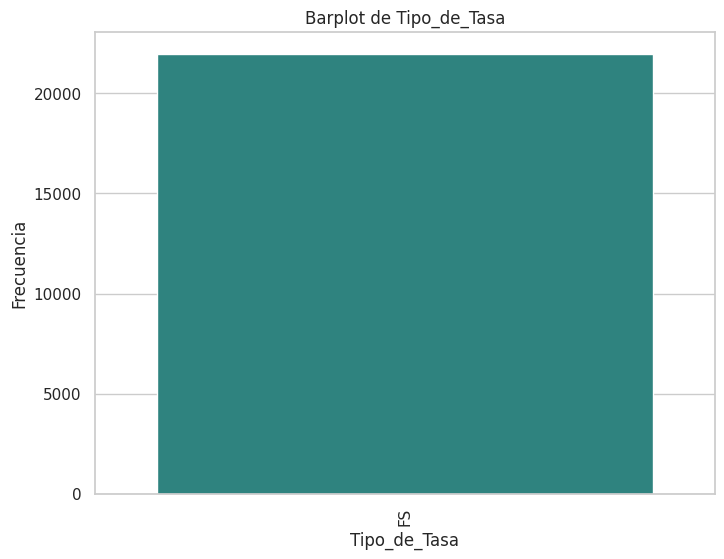

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


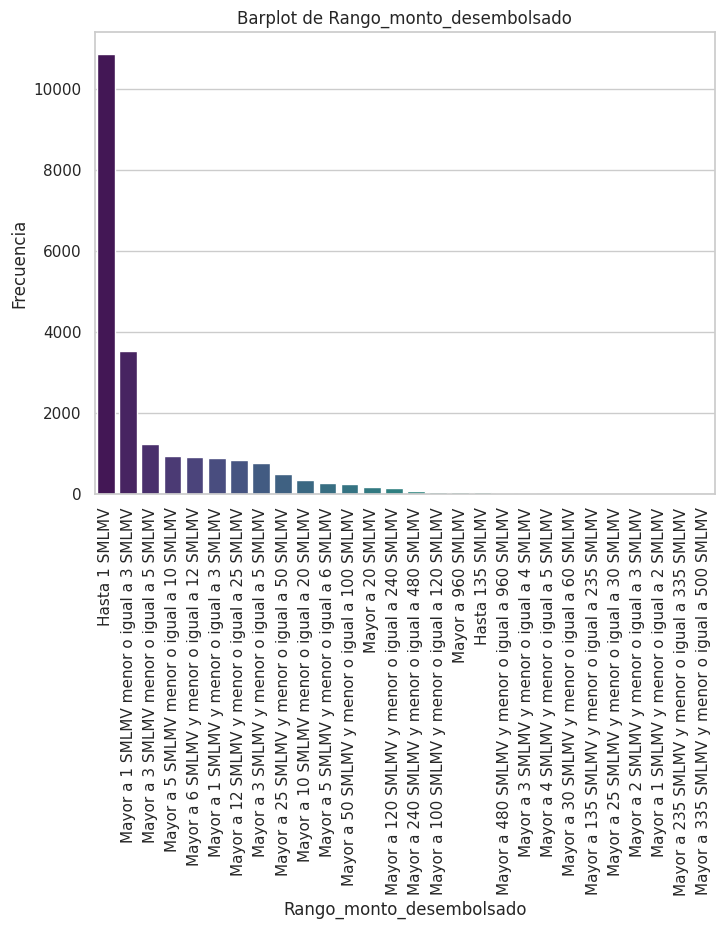

<ipython-input-21-c1b09ad61b04>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras


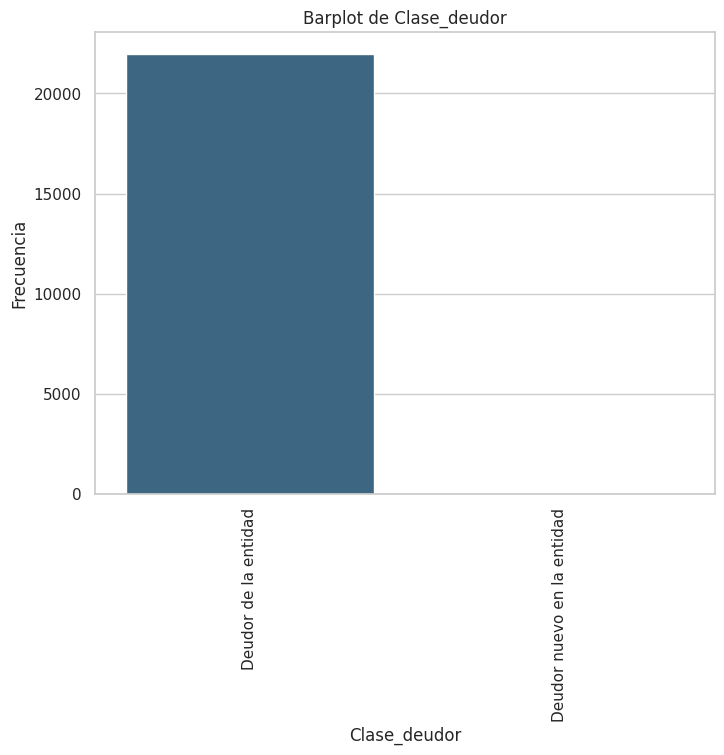

In [21]:
df_Clustering_2=df_Clustering[df_Clustering['k_means_pca']==2.0]
df_Clustering_2.shape
sns.set(style="whitegrid")
# Itera sobre cada columna del DataFrame y crea un gráfico de barras
df_Clustering_2_obj = df_Clustering_2.select_dtypes(include=['object'])

for column in df_Clustering_2_obj.columns:
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    sns.barplot(x=df_Clustering_2_obj[column].value_counts().index, y=df_Clustering_2_obj[column].value_counts(), palette="viridis")  # Grafico de barras
    plt.title(f'Barplot de {column}')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.show()


## Clustering 3

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


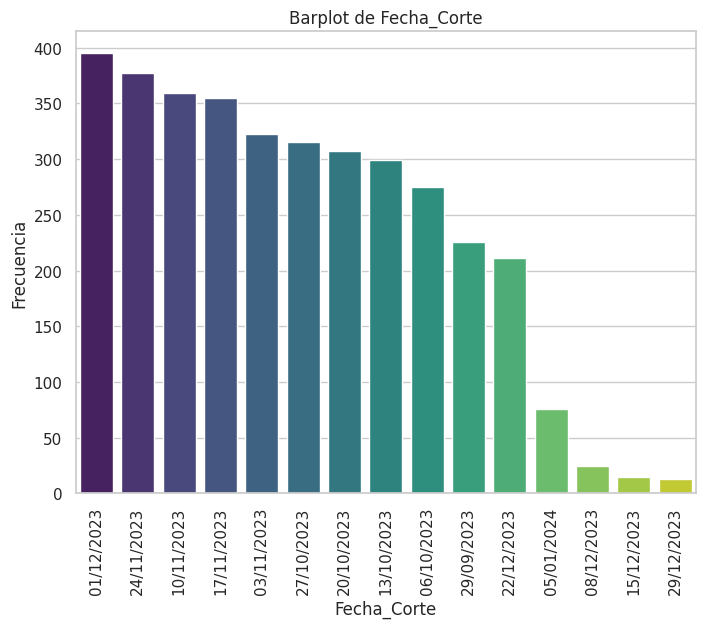

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


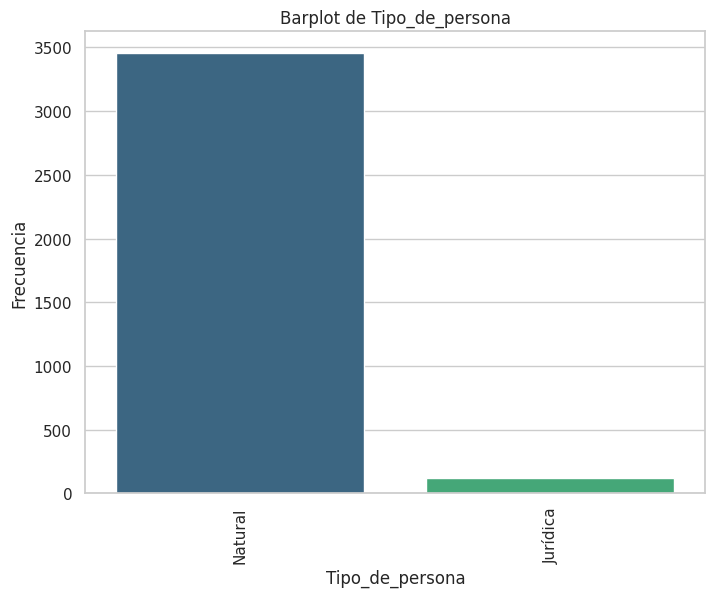

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


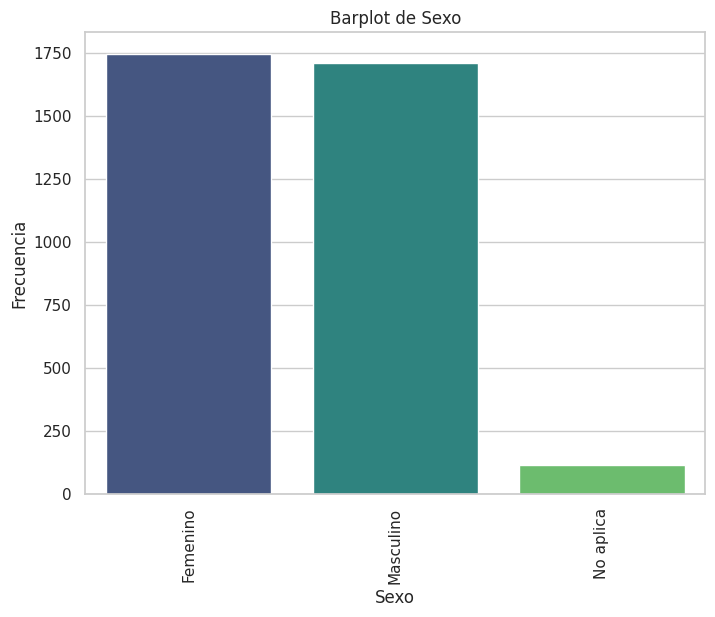

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


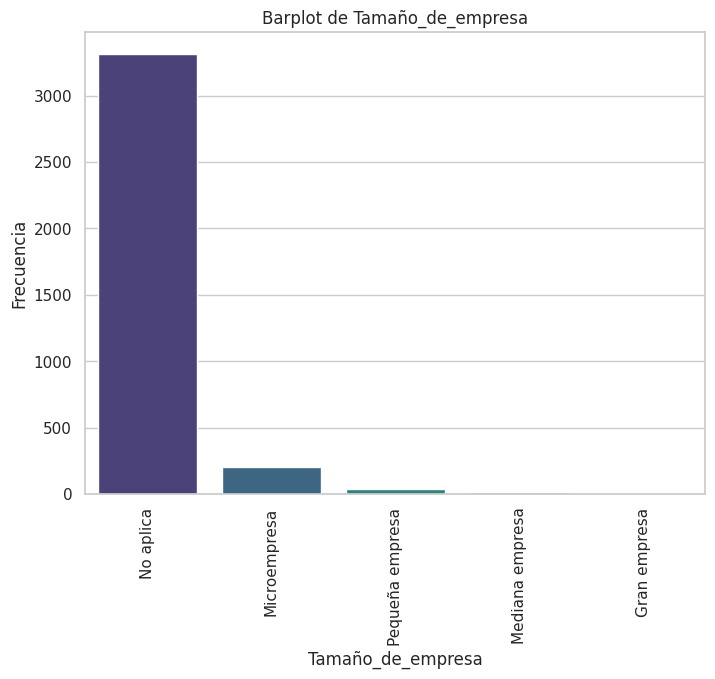

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


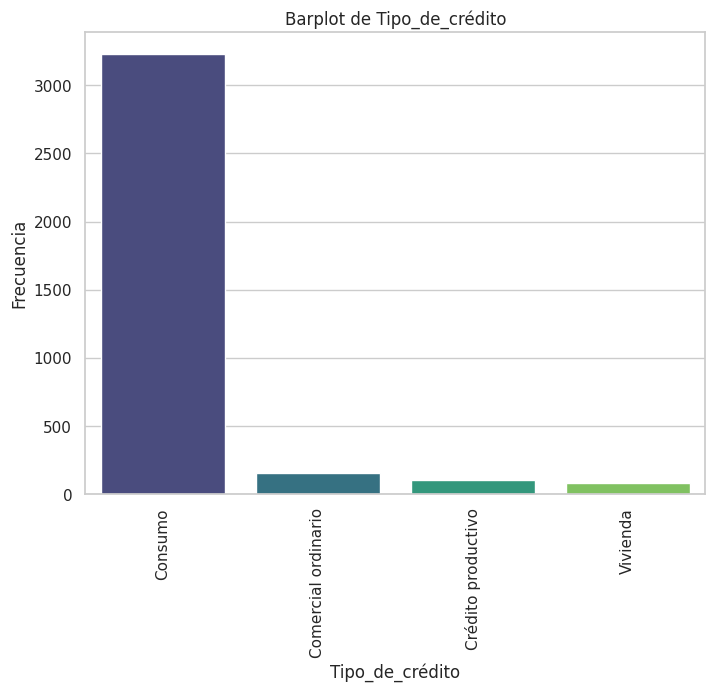

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


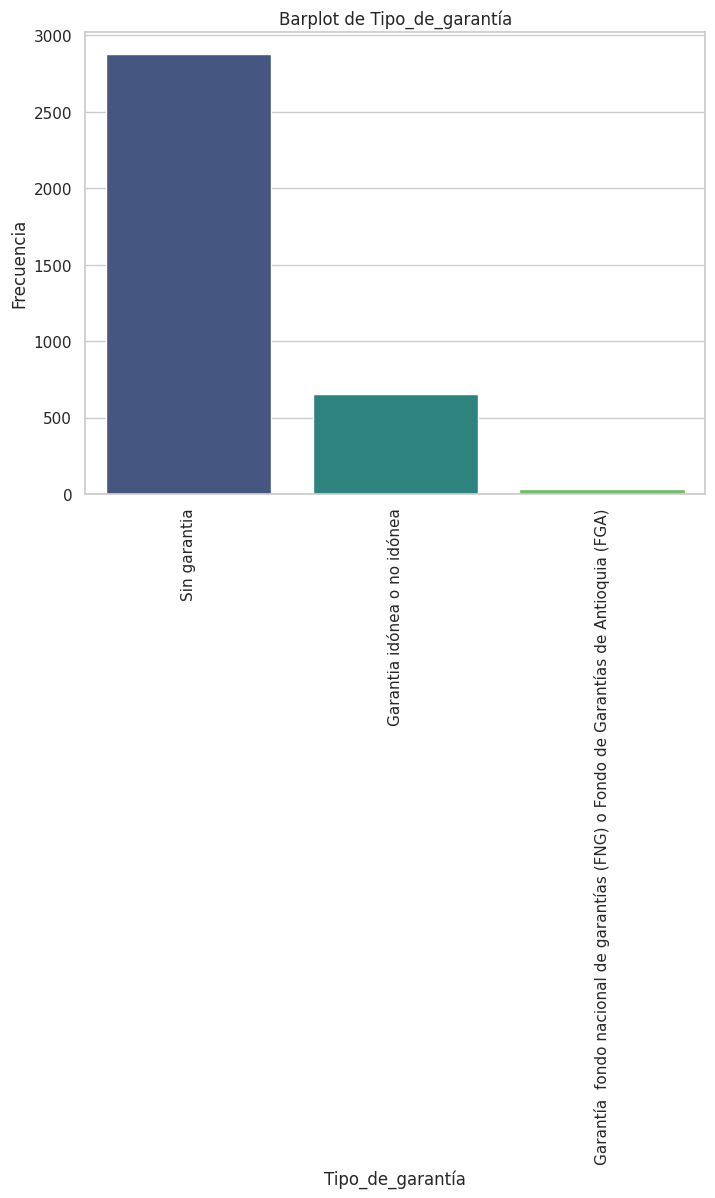

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


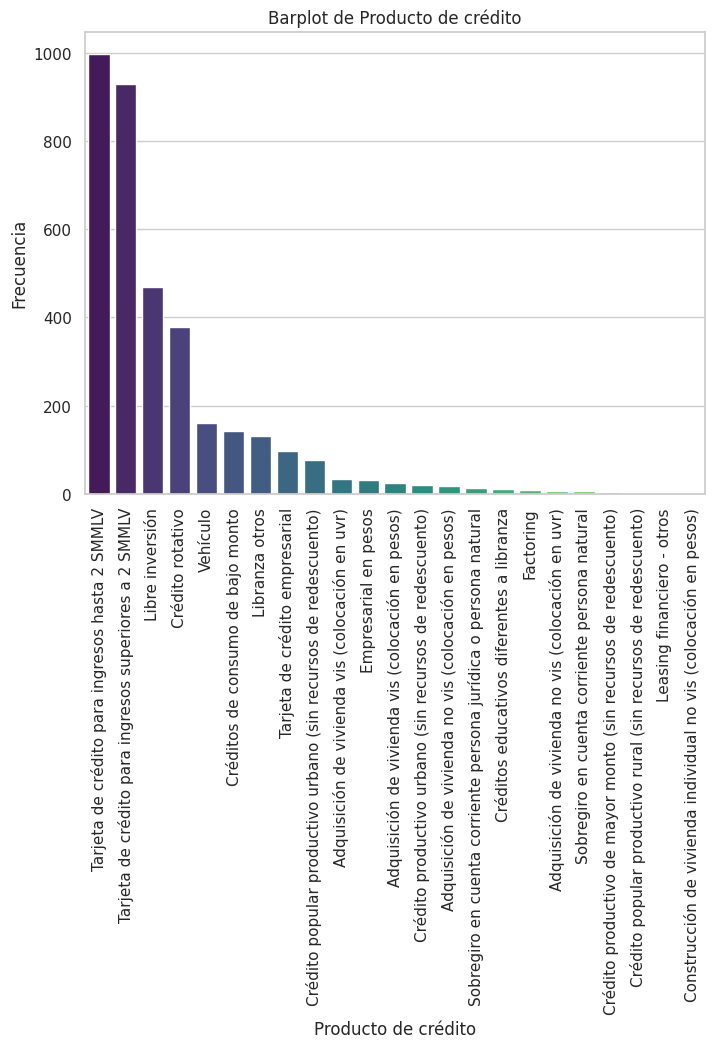

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


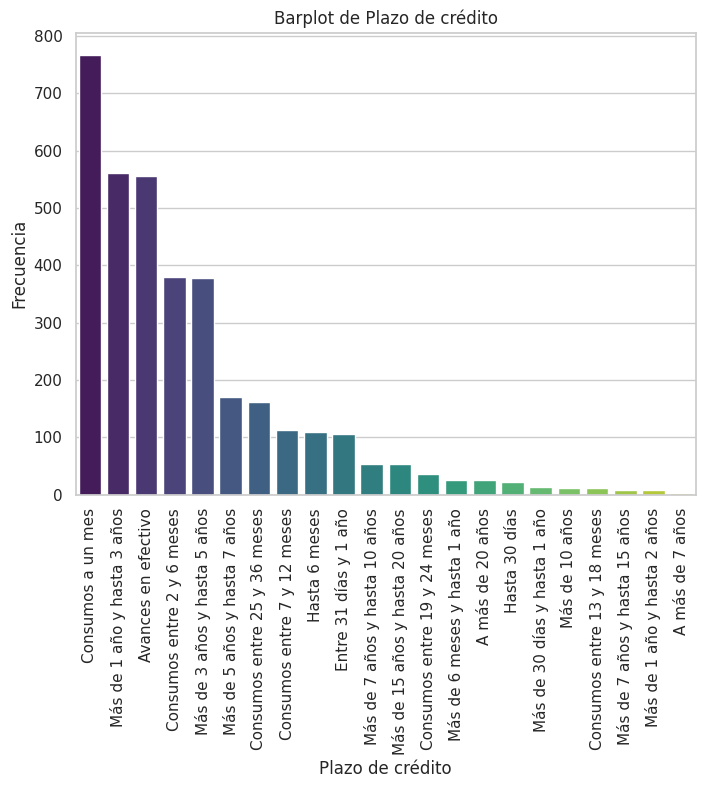

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


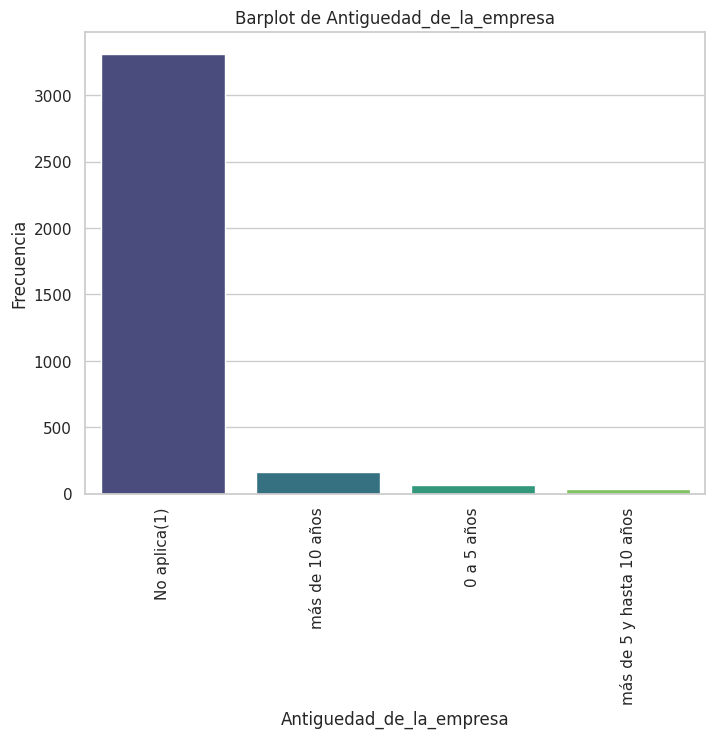

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


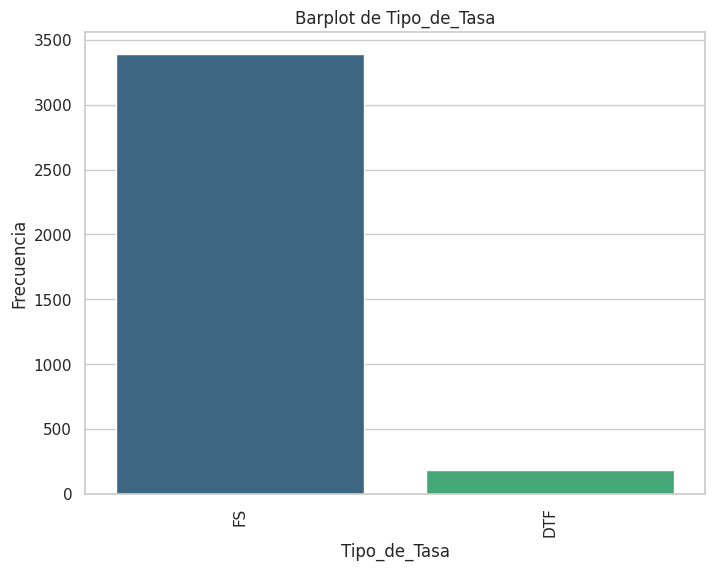

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


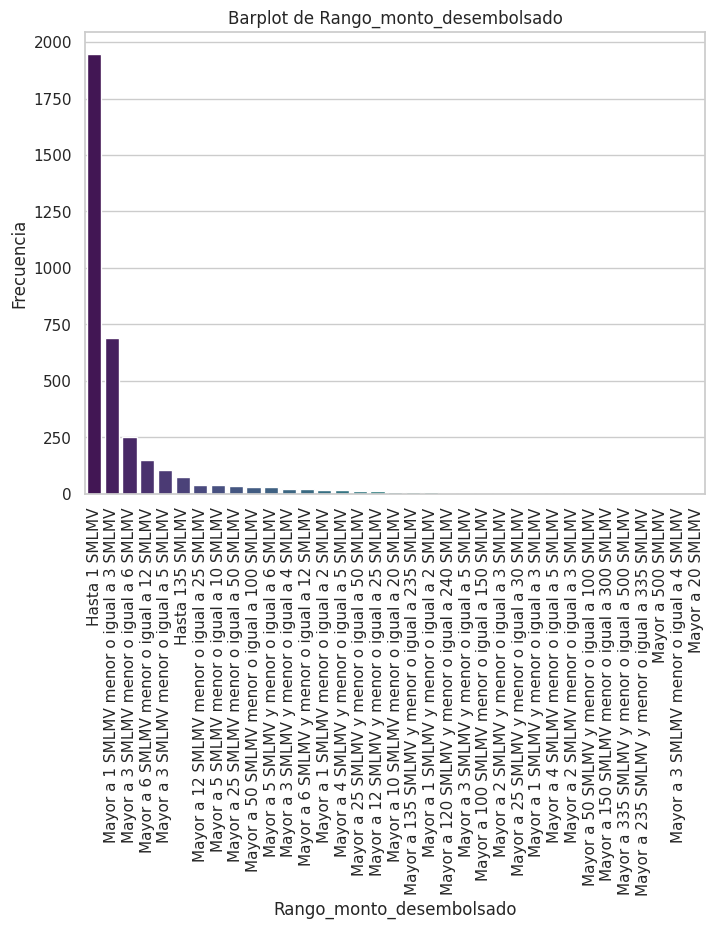

<ipython-input-22-1b708005e0d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras


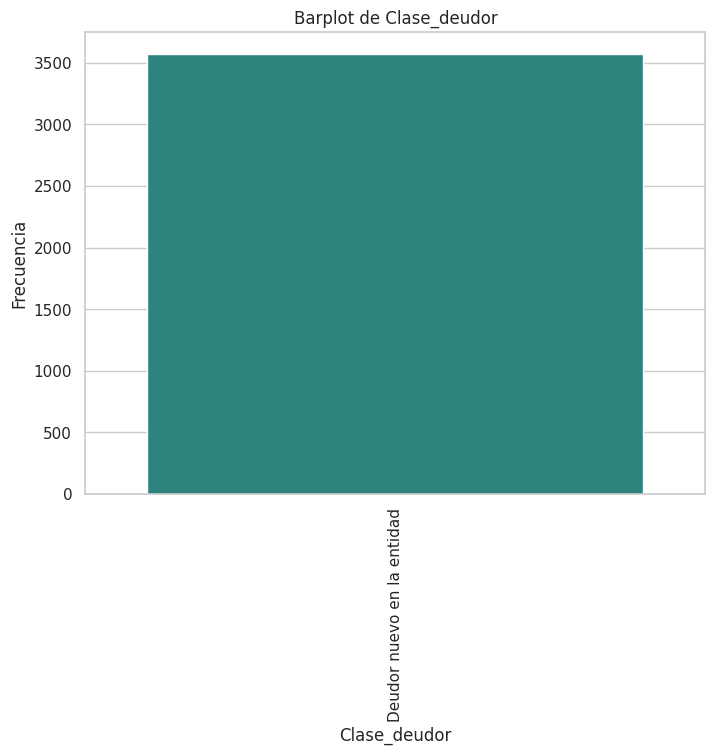

In [22]:
df_Clustering_3=df_Clustering[df_Clustering['k_means_pca']==3.0]
df_Clustering_3.shape
sns.set(style="whitegrid")
# Itera sobre cada columna del DataFrame y crea un gráfico de barras
df_Clustering_3_obj = df_Clustering_3.select_dtypes(include=['object'])

for column in df_Clustering_3_obj.columns:
    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    sns.barplot(x=df_Clustering_3_obj[column].value_counts().index, y=df_Clustering_3_obj[column].value_counts(), palette="viridis")  # Grafico de barras
    plt.title(f'Barplot de {column}')  # Título del gráfico
    plt.xlabel(column)  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
    plt.show()

In [ ]:
df_Clustering_0.columns

Index(['Fecha_Corte', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa',
       'Tipo_de_crédito', 'Tipo_de_garantía', 'Producto de crédito',
       'Plazo de crédito', 'Tasa_efectiva_promedio_ponderada',
       'margen_adicional', 'Montos_desembolsados',
       'Numero_de_creditos_desembolsados', 'Antiguedad_de_la_empresa',
       'Tipo_de_Tasa', 'Rango_monto_desembolsado', 'Clase_deudor',
       'Codigo_CIIU', 'Codigo_Municipio', 'k_means_pca', 'k_means'],
      dtype='object')